## Load Application Event Log

### Load XES File

In [3]:
from pm4py.objects.log.importer.xes import importer as xes_importer


complete_log = xes_importer.apply("data/BPI Challenge 2018.xes")

# Pre-process Complete log

### Keep only cases between  Jan 1, 2015  ---- Jan 20, 2018

In [40]:
from pm4py.algo.filtering.log.timestamp import timestamp_filter

filtered_log = timestamp_filter.filter_traces_contained(complete_log, "2015-01-01 00:00:00", "2018-01-20 23:59:59")

### Keep only cases that take between 100 and 330 days
Disco shows that the majority of the cases is within this amount of days and the assignmment tells us that a case normally starts around May and should end in the same year (8 months is roughly 240 days)
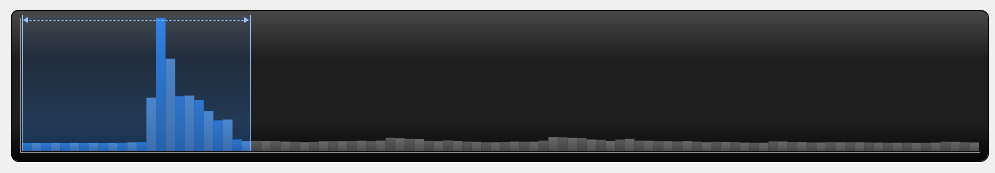

In [36]:
len(filtered_log)

43803

In [43]:
from pm4py.algo.filtering.log.cases import case_filter

pp_log = case_filter.filter_on_case_performance(filtered_log, 8640000, 28512000)

### Keep only cases that have 24 -- 100 events
Looking in Disco shows that the 96% of cases have between this amount of cases
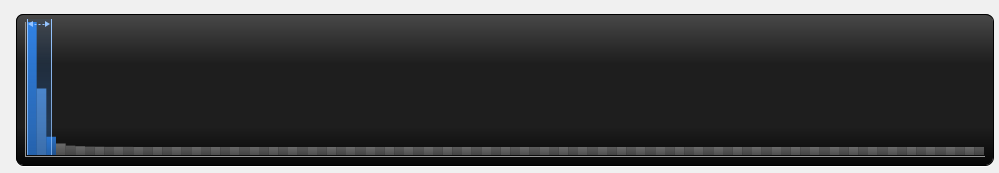

In [44]:
from pm4py.objects.log.util import func

pp_log = func.filter_(lambda x: len(x) >= 24 and len(x) < 100, pp_log)
len(pp_log)

33152

In [8]:
# What do we have left?
print(round(33152/43809 * 100, 2), "%")

75.67 %


# Desired Outcome
### Filter on start & end activity

In [28]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter

#Assignment tells us that a case normally starts around May and should end in the same year 
#(8 months is roughly 240 days)
# desired_outcome = case_filter.filter_on_case_performance(pp_log, 8640000, 20736000)

start_targets = ["mail income"]
end_targets = ["finish payment", "save"]

desired_outcome = start_activities_filter.apply(pp_log, start_targets)

desired_outcome = end_activities_filter.apply(desired_outcome, end_targets)

In [29]:
print(round(len(desired_outcome)/43809 * 100, 2), "%")

66.61 %


# Undesired outcome 1

In [70]:
def check_for_temporal_error(idx, case):
    last_event_ts = case[0]["time:timestamp"]
    for e in case:
        if e["time:timestamp"] < last_event_ts:
            print("In case: {}, Event: {} is before: {}".format(idx, e["time:timestamp"], last_event_ts))
            break
        last_event_ts = e["time:timestamp"]

for case_idx, case in enumerate(pp_log):
    year = case[0]["time:timestamp"].year
#     print("Case: {}, Starts in year: {}".format(case_idx, year))
#     filter_undesired_outcome_1(case)
    check_for_temporal_error(case_idx, case)

# There are a lot of cases that have events not on time based order

In case: 10, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-19 00:00:00+02:00
In case: 22, Event: 2015-04-24 00:00:00+02:00 is before: 2015-05-06 00:00:00+02:00
In case: 31, Event: 2015-05-06 00:00:00+02:00 is before: 2015-05-08 00:00:00+02:00
In case: 44, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-19 00:00:00+02:00
In case: 60, Event: 2015-04-22 00:00:00+02:00 is before: 2015-05-22 00:00:00+02:00
In case: 100, Event: 2015-05-11 00:00:00+02:00 is before: 2015-05-13 00:00:00+02:00
In case: 118, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 125, Event: 2015-05-08 00:00:00+02:00 is before: 2015-05-19 00:00:00+02:00
In case: 129, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 174, Event: 2015-04-30 00:00:00+02:00 is before: 2015-05-05 00:00:00+02:00
In case: 183, Event: 2015-04-17 00:00:00+02:00 is before: 2015-04-25 00:00:00+02:00
In case: 196, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-28 00:00:00+02:

In case: 3241, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 3274, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-26 00:00:00+02:00
In case: 3307, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-28 00:00:00+02:00
In case: 3315, Event: 2015-05-05 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 3316, Event: 2015-04-20 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 3329, Event: 2015-04-20 00:00:00+02:00 is before: 2015-05-19 00:00:00+02:00
In case: 3351, Event: 2015-04-30 00:00:00+02:00 is before: 2015-05-06 00:00:00+02:00
In case: 3361, Event: 2015-04-24 00:00:00+02:00 is before: 2015-05-28 00:00:00+02:00
In case: 3391, Event: 2015-05-04 00:00:00+02:00 is before: 2015-05-20 00:00:00+02:00
In case: 3398, Event: 2015-04-30 00:00:00+02:00 is before: 2015-05-27 00:00:00+02:00
In case: 3431, Event: 2015-04-13 00:00:00+02:00 is before: 2015-05-11 00:00:00+02:00
In case: 3446, Event: 2015-05-07 00:00:00+02:00 is before: 2015-0

In case: 8399, Event: 2015-05-08 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 8457, Event: 2015-04-24 00:00:00+02:00 is before: 2015-04-29 00:00:00+02:00
In case: 8462, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 8488, Event: 2015-05-11 00:00:00+02:00 is before: 2015-05-13 00:00:00+02:00
In case: 8501, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-28 00:00:00+02:00
In case: 8595, Event: 2015-04-30 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 8635, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-20 00:00:00+02:00
In case: 8663, Event: 2015-05-08 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 8665, Event: 2015-05-05 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 8745, Event: 2015-04-30 00:00:00+02:00 is before: 2015-05-26 00:00:00+02:00
In case: 8756, Event: 2015-05-13 00:00:00+02:00 is before: 2015-05-20 00:00:00+02:00
In case: 8767, Event: 2015-05-15 00:00:00+02:00 is before: 2015-0

In case: 13052, Event: 2015-05-12 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 13078, Event: 2015-05-07 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 13103, Event: 2015-04-22 00:00:00+02:00 is before: 2015-05-13 00:00:00+02:00
In case: 13113, Event: 2015-05-12 00:00:00+02:00 is before: 2015-05-15 00:00:00+02:00
In case: 13158, Event: 2015-05-06 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 13167, Event: 2015-05-08 00:00:00+02:00 is before: 2015-05-18 00:00:00+02:00
In case: 13175, Event: 2015-04-28 00:00:00+02:00 is before: 2015-05-06 00:00:00+02:00
In case: 13188, Event: 2015-04-24 00:00:00+02:00 is before: 2015-04-28 00:00:00+02:00
In case: 13191, Event: 2015-05-15 00:00:00+02:00 is before: 2015-05-27 00:00:00+02:00
In case: 13198, Event: 2015-05-06 00:00:00+02:00 is before: 2015-05-29 00:00:00+02:00
In case: 13207, Event: 2015-04-20 00:00:00+02:00 is before: 2015-05-20 00:00:00+02:00
In case: 13227, Event: 2015-04-20 00:00:00+02:00 is be

In case: 30574, Event: 2017-05-11 00:00:00+02:00 is before: 2017-05-12 00:00:00+02:00
In case: 30730, Event: 2017-05-12 00:00:00+02:00 is before: 2017-05-24 00:00:00+02:00
In case: 31140, Event: 2017-05-15 00:00:00+02:00 is before: 2017-05-17 00:00:00+02:00
In case: 32510, Event: 2017-05-03 00:00:00+02:00 is before: 2017-05-15 00:00:00+02:00
In case: 32515, Event: 2017-05-12 00:00:00+02:00 is before: 2017-05-14 00:00:00+02:00
In case: 33412, Event: 2017-05-12 00:00:00+02:00 is before: 2017-05-31 00:00:00+02:00
In case: 33787, Event: 2017-05-11 00:00:00+02:00 is before: 2017-06-19 00:00:00+02:00
In case: 34253, Event: 2017-05-11 00:00:00+02:00 is before: 2017-05-29 00:00:00+02:00
In case: 35179, Event: 2017-06-02 00:00:00+02:00 is before: 2017-07-10 00:00:00+02:00
In case: 38264, Event: 2017-05-12 00:00:00+02:00 is before: 2017-05-16 00:00:00+02:00
In case: 39849, Event: 2017-05-15 00:00:00+02:00 is before: 2017-05-29 00:00:00+02:00
In case: 41549, Event: 2017-05-04 00:00:00+02:00 is be

In [90]:
def filter_undesired_outcome_1(case):
    """
    Since we can't guarrentee that the events are all sorted on time
    we have to first create a list of all begin / abort payment events
    """
    year = case[0]["time:timestamp"].year
    aborts = []
    begins = []
    for e in case: # Reverse the trace so we start from last event
        if e["concept:name"] == "abort payment":
            aborts.append(e["time:timestamp"])
        if e["concept:name"] == "begin payment":
            begins.append(e["time:timestamp"])
    if not any(b for b in begins if b.year == year):
        print("There was no begin payment in the same year as the start")
        return True
    elif any(a for a in aborts if all(b < a for b in begins)):
        abort = [a for a in aborts if all(b < a for b in begins)][0]
        print("Abort: {} happened later than any of the being payments".format(abort))
        return True
    else:
        return False
    
undesired_outcome_1 = func.filter_(filter_undesired_outcome_1, pp_log)
print(len(undesired_outcome_1))

There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in t

There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
There was no begin payment in the same year as the start
Abort: 2018-01-05 14:44:33.303000+01:00 happened later than any of the being payments
Th

# Undesired outcome 2

In [14]:
def filter_undesired_outcome_2(case):
    """
    We will check if there is any case with subprocess is Change or Objection
    """
    if any(e for e in case if e["subprocess"] == "Change"):
        print("There was a Change in the application")
        return True
    if any(e for e in case if e["subprocess"] == "Objection"):
        print("There was an Objection in the application")
        return True
    return False

undesired_outcome_2 = func.filter_(filter_undesired_outcome_2, pp_log)
len(undesired_outcome_2)

There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a 

There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was an Objection in the application
There was an Objection in the application
There was a Change in the application
There was a Change in the application
There was an Objection in the application
There was a Change in the application
There was a Change in the application
There was an Objection in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was an Objection in the application
There was an Objection in the application
There was an Objection in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was a Change in the application
There was an Objection in the application
There was a Change

442

## Export Filtered log

### As Xes

In [30]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
xes_exporter.apply(desired_outcome, 'data/desired_outcome.xes')

### As CSV

In [31]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(desired_outcome, variant=log_converter.Variants.TO_DATA_FRAME)
dataframe.to_csv('data/desired_outcome.csv')

# Discover models (Part 1)

# Model evaluation

In [12]:
from pm4py import view_petri_net, save_vis_petri_net
from pm4py.objects.petri.exporter import exporter as pnml_exporter
from pm4py.evaluation.replay_fitness import evaluator as replay_fitness_evaluator
from pm4py.evaluation.precision import evaluator as precision_evaluator
from pm4py.evaluation.generalization import evaluator as generalization_evaluator
from pm4py.evaluation.simplicity import evaluator as simplicity_evaluator

def get_fitness(log, net, im, fm):
    return replay_fitness_evaluator.apply(log, net, im, fm, 
              variant=replay_fitness_evaluator.Variants.TOKEN_BASED)        

def get_precision(log, net, im, fm):
    return precision_evaluator.apply(log, net, im, fm, 
             variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

def get_generalization(log, net, im, fm):
    return generalization_evaluator.apply(log, net, im, fm)

def get_simplicity(net):
    return simplicity_evaluator.apply(net)
       

### Alpha Miner

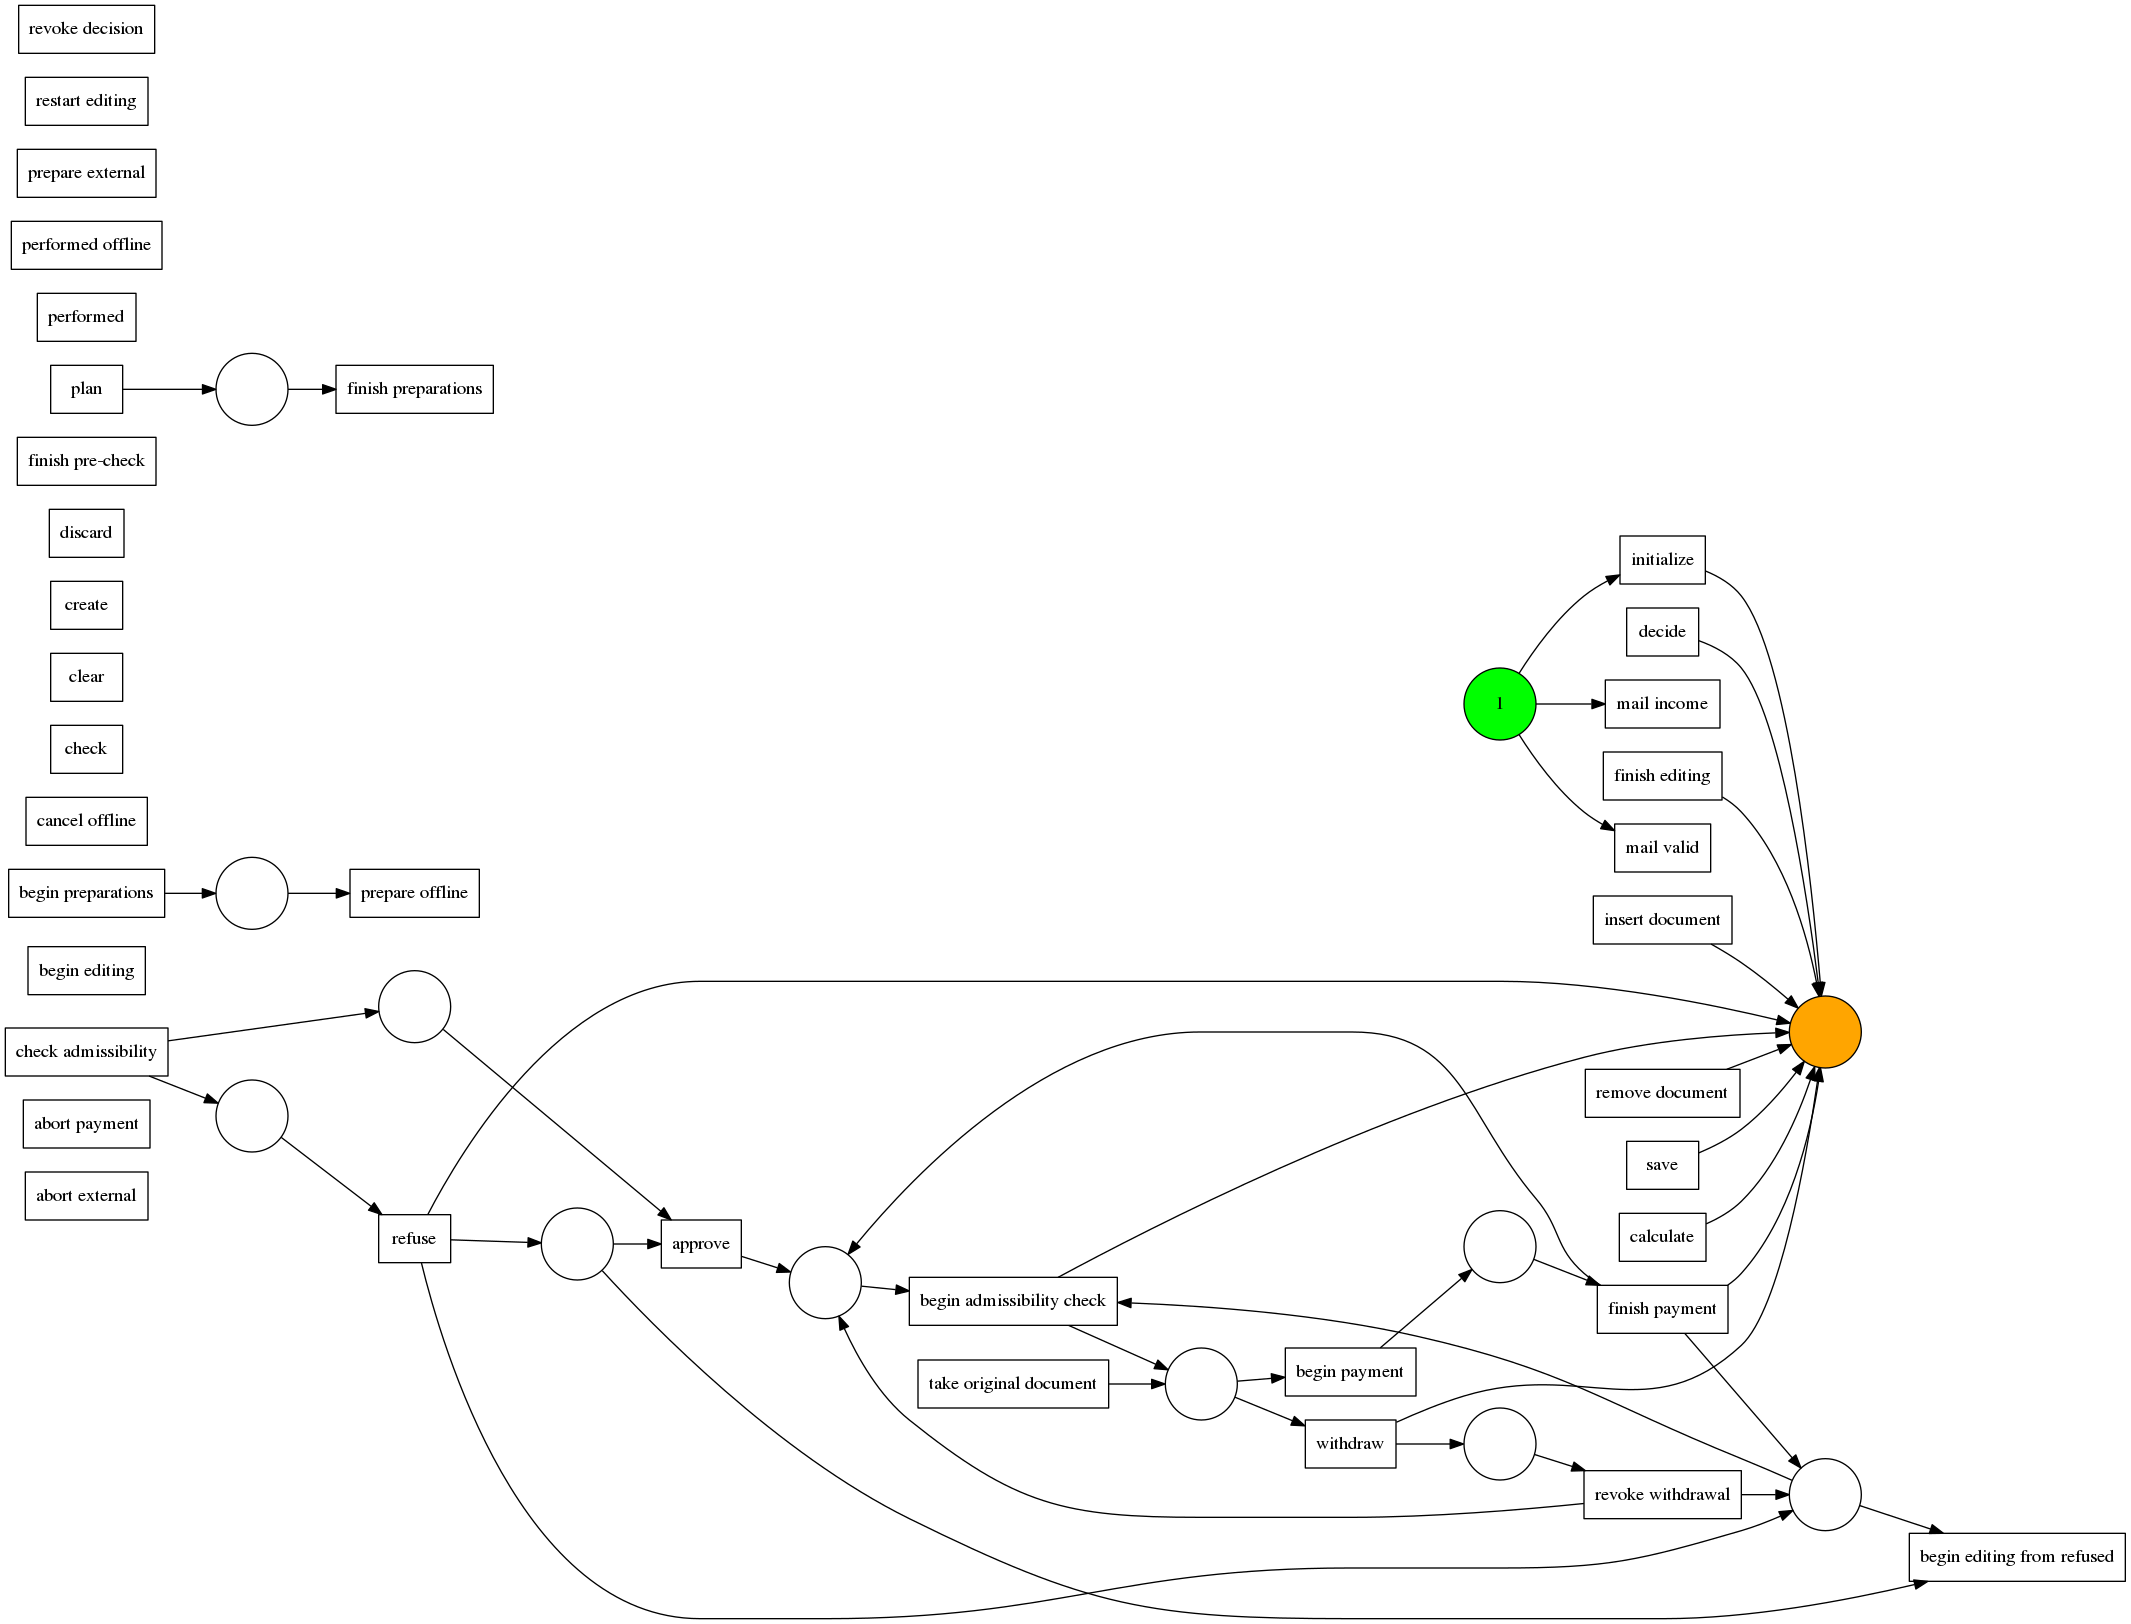

Simplicity:  1.0
Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.17943664265103296, 'log_fitness': 0.1798809122185488}
Generalization:  0.7960187790389952


In [32]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

alpha_net, alpha_im, alpha_fm = alpha_miner.apply(undesired_outcome_2)

pnml_exporter.apply(alpha_net, alpha_im, 
                    "nets/undesired_outcome_2_alpha_miner.pnml", 
                    final_marking=alpha_fm)
view_petri_net(alpha_net, alpha_im, alpha_fm, format='png')
print("Simplicity: ", get_simplicity(alpha_net))
print("Fitness: ", get_fitness(undesired_outcome_2, alpha_net, alpha_im, alpha_fm))
print("Generalization: ", get_generalization(undesired_outcome_2, alpha_net, alpha_im, alpha_fm))
# print("Precision: ", get_precision(undesired_outcome_2, alpha_net, alpha_im, alpha_fm))

### Inductive miner

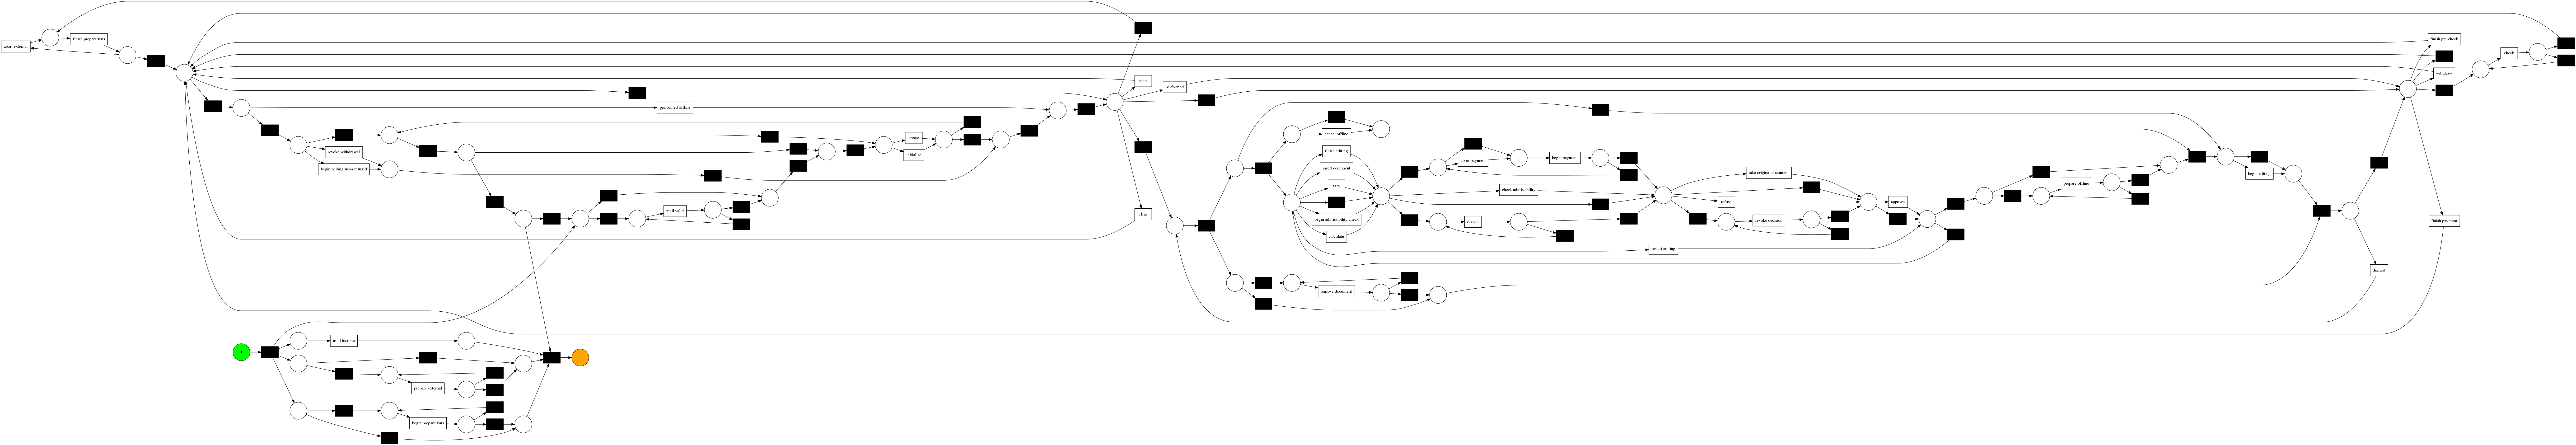

Simplicity:  0.6000000000000001
Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}
Generalization:  0.8267254274431709


In [33]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
inductive_net, inductive_im, inductive_fm = inductive_miner.apply(undesired_outcome_2)

pnml_exporter.apply(inductive_net, inductive_im, 
                    "nets/undesired_outcome_2_inductive_miner.pnml", 
                    final_marking=inductive_fm)
view_petri_net(inductive_net, inductive_im, inductive_fm, format='png')
print("Simplicity: ", get_simplicity(inductive_net))
print("Fitness: ", get_fitness(undesired_outcome_2, inductive_net, inductive_im, inductive_fm))
print("Generalization: ", get_generalization(undesired_outcome_2, inductive_net, inductive_im, inductive_fm))
# print("Precision: ", get_precision(undesired_outcome_2, inductive_net, inductive_im, inductive_fm))

In [20]:
print("Precision: ", get_precision(undesired_outcome_2, inductive_net, inductive_im, inductive_fm))

Precision:  0.039182212462746446


### Heuristic miner

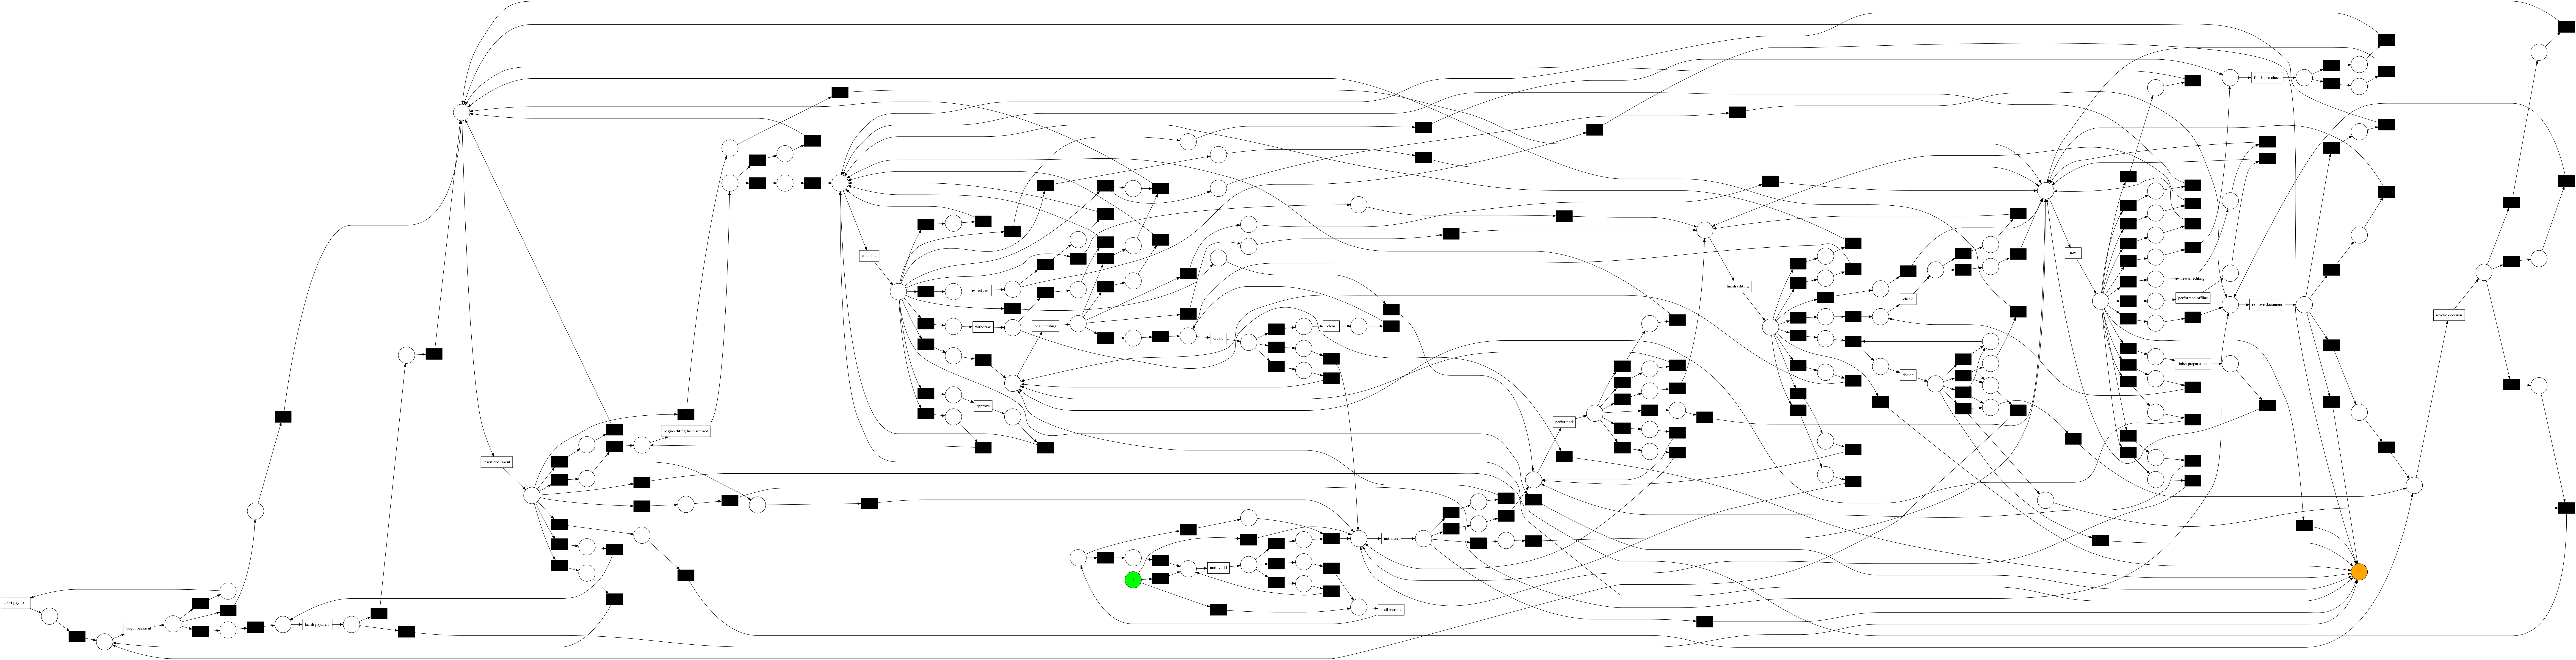

Simplicity:  0.6761133603238867
Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9607004446510441, 'log_fitness': 0.96042454211547}
Generalization:  0.8189175747339914


In [34]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net, heu_im, heu_fm = heuristics_miner.apply(undesired_outcome_2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

pnml_exporter.apply(heu_net, heu_im, "nets/undesired_outcome_2_heuristic.pnml", final_marking=heu_fm)
view_petri_net(heu_net, heu_im, heu_fm, format='png')
print("Simplicity: ", get_simplicity(heu_net))
print("Fitness: ", get_fitness(undesired_outcome_2, heu_net, heu_im, heu_fm))
print("Generalization: ", get_generalization(undesired_outcome_2, heu_net, heu_im, heu_fm))
# print("Precision: ", get_precision(desired_outcome, heu_net, heu_im, heu_fm))

In [22]:
print("Precision: ", get_precision(undesired_outcome_2, heu_net, heu_im, heu_fm))

Precision:  0.7766959798994975
